In [1]:
import pandas as pd
import numpy as np
import statistics
from sklearn.model_selection import StratifiedShuffleSplit
import math
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import keras



import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import random


C:\Users\HeavyRain350\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\HeavyRain350\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\HeavyRain350\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = pd.read_csv("roundnessdata2.csv",skip_blank_lines = False)
#train_df = pd.read_csv("traindata.csv",skip_blank_lines = False)
#test_df = pd.read_csv("testdata.csv")

In [3]:
data = data.drop(data[(data.roundness>=.15) & (data.roundness<.25)].iloc[500:1000,:].index)#Eliminimos 500 de la clase 2
data = data.drop(data[(data.roundness>=.25) & (data.roundness<.35)].iloc[500:1000,:].index)#Eliminimos 500 de la clase 3
data = data.sort_values('roundness') #Se aacomoda por los valores delroundness
data = data.reset_index().iloc[:,1:data.shape[1]+1] #Se acomodan los indices y se borran los viejos
#data = data.drop(data[pd.isnull(data.roundness)].index)


In [78]:
data

,roundness,a1,b1,c1,d1,a2,b2,c2,d2,a3,...,c48,d48,a49,b49,c49,d49,a50,b50,c50,d50
0,0.080557,1,0.000000e+00,9.903970e-17,0.954963,0.114954,-0.031057,-0.021788,-0.161392,0.010673,...,-0.000427,-0.000010,0.000705,0.001306,-9.762790e-05,0.000554,0.000198,-2.476790e-05,0.000262,-0.000360
1,0.084652,1,6.112790e-17,-1.358400e-17,0.895410,0.011966,0.003635,0.037373,0.009965,0.007282,...,-0.000078,-0.000012,-0.000320,-0.000119,-2.289330e-04,0.000517,0.000127,-1.334350e-04,0.000194,0.000825
2,0.086624,1,-1.237970e-17,2.475940e-17,0.807241,0.082024,0.033503,0.027476,-0.009599,0.005901,...,0.000332,-0.001022,0.000398,-0.000483,-1.925450e-04,0.000113,-0.000789,1.193478e-03,0.000589,-0.000061
3,0.086746,1,7.413350e-17,7.413350e-17,0.846799,0.205892,0.001085,-0.150790,0.025700,-0.006972,...,-0.000357,0.000551,0.001230,-0.000592,3.713140e-04,-0.000153,-0.000971,8.085540e-04,-0.000443,-0.000702
4,0.089054,1,0.000000e+00,1.122880e-17,0.803113,-0.001279,-0.001738,0.002260,-0.002204,0.026832,...,-0.000037,-0.000094,0.000196,-0.000067,2.005740e-04,0.000099,-0.000135,-9.246950e-05,-0.000086,0.000025
5,0.090757,1,-4.493910e-17,0.000000e+00,0.815152,0.015775,-0.098022,-0.088942,-0.001322,0.035937,...,0.001141,-0.000485,-0.000098,0.000328,-9.280890e-04,0.001063,0.000566,-6.032780e-04,0.000515,-0.000038
6,0.092326,1,-6.945650e-17,1.389130e-16,0.753801,0.062558,-0.077989,-0.093606,0.057338,0.031847,...,-0.001761,-0.000377,-0.000411,-0.000847,9.288200e-04,-0.000252,0.000006,8.665850e-04,0.000780,0.000325
7,0.092720,1,-4.258400e-17,0.000000e+00,0.942255,-0.013440,0.007465,0.033994,0.074545,0.026518,...,0.000465,0.000181,0.000130,-0.000310,4.621600e-04,0.000019,-0.000025,3.196960e-04,0.000151,0.000475
8,0.095631,1,4.273420e-17,0.000000e+00,-0.723341,-0.024132,0.007060,-0.004301,-0.044454,0.056471,...,0.000459,0.000139,0.000418,-0.000348,-8.075910e-06,-0.000061,0.000682,2.491120e-04,-0.000081,0.000290
9,0.096208,1,-9.369940e-17,1.405490e-16,0.727587,0.063364,0.045611,0.013751,-0.021233,0.019191,...,0.000813,-0.000476,-0.000016,-0.000505,-7.249900e-04,0.000336,0.000348,4.040180e-06,0.000711,0.000272


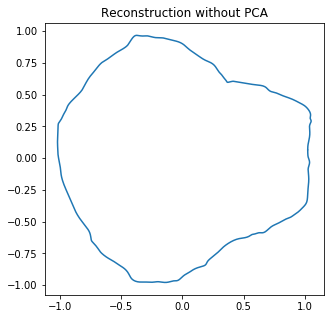

In [31]:
A0=0
C0=0
recon=np.zeros((leng_chain,2))
for t in range(leng_chain):
    x = 0.0
    y = 0.0
    for ii in range(60):
        x = x + (vector[0,ii,0] * np.cos(2 * (ii+1) * np.pi * (t+1) / leng_chain) + vector[1,ii,0] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
        y = y + (vector[2,ii,0] * np.cos(2 * (ii+1) * np.pi * (t+1) / leng_chain) + vector[3,ii,0] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
    recon[t,0] = A0 + x
    recon[t,1] = C0 + y 
# print(recon[0:9,:])    
plt.figure(figsize=(5, 5))   
plt.plot(recon[:,0], recon[:,1]);   
plt.title('Reconstruction without PCA')
plt.show()   

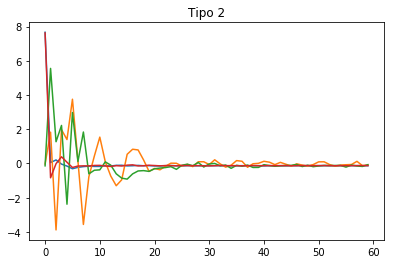

In [32]:
leng_chain=869
scaler = StandardScaler()
fig = plt.figure(figsize = (14,4))
arr = np.transpose(vector[:,:,0])
arr_std=scaler.fit_transform(arr)
b = fig.add_subplot(1, 2, 2)
b.set_title('Tipo 2')
plt.plot(arr_std2[:,0])
plt.plot(arr_std2[:,1])
plt.plot(arr_std2[:,2])
plt.plot(arr_std2[:,3])
plt.show()

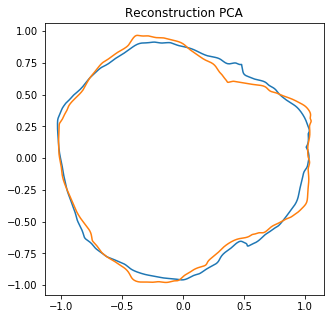

In [36]:
#pca = PCA(n_components=4)
pca = PCA(n_components=2,svd_solver='full')
pca.fit(arr_std)
pca_data=pca.transform(arr_std)
# print (pca.explained_variance_)
# print (pca.explained_variance_ratio_)
# print (pca.explained_variance_ratio_.cumsum())

eigenvectores=pca.components_
eigenvalores=pca.singular_values_
# per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
# labels=['PC'+str(x) for x in range(1,len(per_var)+1)]
# plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)

reco=pca.inverse_transform(pca_data)
reco=scaler.inverse_transform(reco)
# print(reco.shape)

reco=reco.T
A0=0
C0=0
recon2=np.zeros((leng_chain,2))
for t in range(leng_chain):
    x = 0.0
    y = 0.0
    for ii in range(60):
        x = x + (reco[0,ii] * np.cos(2 * (ii+1) * np.pi * (t+1) / leng_chain) + reco[1,ii] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
        y = y + (reco[2,ii] * np.cos(2 * (ii+1) * np.pi * (t+1) /leng_chain) + reco[3,ii] * np.sin(2 * (ii+1) * np.pi* (t+1) / leng_chain))
    recon2[t,0] = A0 + x
    recon2[t,1] = C0 + y 
# print(recon[0:9,:])    
plt.figure(figsize=(5, 5))   
plt.plot(recon2[:,0], recon2[:,1]);  
plt.plot(recon[:,0], recon[:,1]);  
plt.title('Reconstruction PCA')
plt.show() 

In [3]:
#Se acomoda la información de cada particula
matrix = np.zeros((data.shape[0],60*3))
vector = np.transpose(data.iloc[:,1:241])
sc = StandardScaler() 
#vector = sc.fit_transform(vector) 
vector = vector.values.reshape(4,60,data.shape[0])
pca = PCA(3,svd_solver='full') 
#pca.fit(np.transpose(vector[:,:,0])) 

In [127]:
#Se ejecuta la estandarización y el pca de cada
for i in range(0,vector.shape[2]):
    vector[:,:,i] = sc.fit_transform(vector[:,:,i]) 
    
    matrix[i,:]=np.concatenate(np.transpose(pca.fit_transform(np.transpose(vector[:,:,i]))))
    print(pca.explained_variance_ratio_.cumsum())

[0.41819025 0.73734009 1.        ]
[0.45700619 0.74102832 1.        ]
[0.45163976 0.79948332 1.        ]
[0.419342  0.7414501 1.       ]
[0.41819025 0.73734009 1.        ]
[0.46344388 0.76389829 1.        ]
[0.45669702 0.78104437 1.        ]
[0.41591269 0.75101585 1.        ]
[0.46648005 0.78302801 1.        ]
[0.40126985 0.75893512 1.        ]
[0.38297587 0.74019245 1.        ]
[0.43125321 0.7352089  1.        ]
[0.4016713 0.766212  1.       ]
[0.42409809 0.74600644 1.        ]
[0.36882255 0.71362111 1.        ]
[0.43213675 0.75266672 1.        ]
[0.40856334 0.7337673  1.        ]
[0.40399642 0.75240187 1.        ]
[0.39032865 0.74973136 1.        ]
[0.42037894 0.75027634 1.        ]
[0.45648622 0.75006541 1.        ]
[0.38269201 0.73709454 1.        ]
[0.3807336 0.7600394 1.       ]
[0.41035339 0.78209078 1.        ]
[0.43980502 0.78549794 1.        ]
[0.44378907 0.78173707 1.        ]
[0.38499539 0.75456389 1.        ]
[0.47156748 0.78618757 1.        ]
[0.38814607 0.75633023 1.    

In [177]:
test_x.iloc[test_res.index]

,finalCellRound7,finalCellRound8,finalCellRound9,finalCellRound10,finalCellRound11,finalCellRound12,finalCellRound13,finalCellRound14,finalCellRound15,finalCellRound16,...,finalCellRound222,finalCellRound223,finalCellRound224,finalCellRound225,finalCellRound226,finalCellRound227,finalCellRound228,finalCellRound229,finalCellRound230,finalCellRound231
0,0.000949,-0.002828,0.001499,-0.000730,0.000834,0.000578,0.000353,0.000406,0.000022,-0.000140,...,0.000021,-0.000142,-0.000028,0.000216,0.000082,-0.000118,-3.499770e-05,1.970320e-05,-4.229430e-05,3.437860e-07
1,-0.006646,0.005027,-0.006784,0.008540,-0.006746,0.001231,-0.008350,-0.005872,-0.001919,-0.002153,...,-0.001545,0.000408,0.000362,-0.000359,0.000381,0.000544,3.519110e-04,-3.673900e-04,-1.570647e-03,3.144160e-04
2,-0.008532,-0.003711,0.002162,-0.008279,0.004800,-0.003268,0.005796,0.001991,0.003307,0.000691,...,-0.000688,-0.000319,-0.000743,-0.000147,0.000405,0.000942,2.398240e-04,-4.569600e-04,-1.496280e-04,-5.152340e-04
3,0.010155,-0.012269,0.016582,-0.010907,0.000028,0.001983,0.000008,0.005362,0.004604,0.002708,...,-0.000650,0.000429,0.000455,-0.000089,-0.000718,0.000866,3.297940e-07,-2.268300e-04,4.550110e-04,-1.340110e-04
4,-0.000339,-0.003087,-0.000149,-0.000972,0.000273,0.000240,0.000571,-0.000031,-0.000215,-0.000164,...,0.000094,0.000076,-0.000026,-0.000023,0.000092,0.000062,-1.152900e-04,-5.676590e-05,-3.944330e-05,1.248700e-04
5,0.002181,0.002220,0.004439,-0.000214,0.000174,-0.001285,0.001502,0.000093,0.002045,-0.000474,...,-0.001137,-0.000425,0.000470,0.000960,-0.000363,-0.000796,2.916720e-04,-1.039151e-03,1.700410e-04,1.013799e-03
6,0.007233,0.002686,-0.001389,0.001553,0.002377,-0.005432,-0.000938,-0.003403,0.000676,-0.002334,...,-0.000791,0.000011,-0.000175,0.000553,0.000633,-0.000490,3.031310e-04,-1.988180e-04,-5.262500e-04,-2.128050e-04
7,0.002848,-0.001310,-0.000424,-0.000016,0.000762,0.001037,0.000069,-0.000296,-0.000404,-0.000031,...,0.000074,0.000041,0.000037,0.000008,-0.000014,-0.000149,-1.305200e-05,9.641500e-05,7.763810e-05,-6.736700e-05
8,-0.002472,-0.004314,0.000822,0.000194,0.002637,-0.001914,0.000615,0.001477,-0.000663,0.000144,...,0.000365,-0.000947,0.000461,0.000439,-0.000369,-0.000196,-3.466780e-04,-2.088240e-04,1.817310e-04,-1.344240e-04
9,0.004961,-0.000179,-0.000811,0.000084,-0.001278,0.000145,-0.000786,-0.000326,0.000050,-0.000500,...,0.000071,-0.000114,-0.000095,0.000023,-0.000024,0.000067,1.278620e-05,-1.469150e-04,1.011000e-04,2.565280e-05


<function matplotlib.pyplot.show(*args, **kw)>

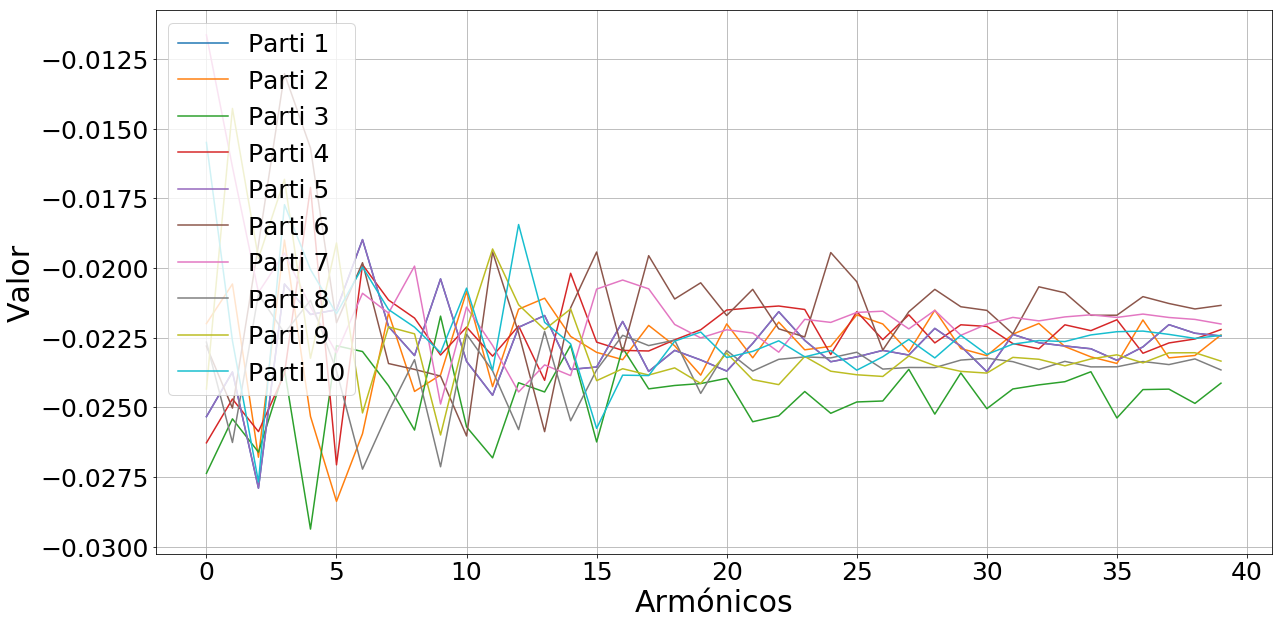

In [6]:
plt.figure(figsize=(20,10)) 
#range(test_res['predicted'].shape[0],0,-1)
plt.plot(matrix[0,10:50], label="Parti 1") 
plt.plot(matrix[1,10:50], label="Parti 2") 
plt.plot(matrix[2,10:50], label="Parti 3") 
plt.plot(matrix[3,10:50], label="Parti 4") 
plt.plot(matrix[4,10:50], label="Parti 5") 
plt.plot(matrix[5,10:50], label="Parti 6") 
plt.plot(matrix[6,10:50], label="Parti 7") 
plt.plot(matrix[7,10:50], label="Parti 8") 
plt.plot(matrix[8,10:50], label="Parti 9") 
plt.plot(matrix[9,10:50], label="Parti 10") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Valor', fontsize=30) 
plt.xlabel('Armónicos', fontsize=30) 
plt.legend(loc="upper left")

#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35) 
plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True) 
plt.show

In [17]:
#lim_inf = 1
#lim_sup = 242
#neuronas = 10 
#np.r_[0:124,376:500,1001:1123] 1 4 9
#np.r_[0:124,250:374,500:625,750:875,1000:1123]
train_x = data.iloc[:,21:121]

train_y = data.iloc[:,0:1]
#np.r_[661:848,0:98]
#train_x = train_df.iloc[:,lim_inf:lim_sup]

#train_y = train_df.iloc[:,0:1]
#np.r_[214:275,0:27]
#test_x = test_df.iloc[:,lim_inf:lim_sup]

#test_y = test_df.iloc[:,0:1]

#Para cuando se usa PCA
#train_x, test_x, train_y, test_y = train_test_split(matrix[:,np.r_[9:50,69:100,109:150]], train_y, test_size=0.2)
#Cuando se usa los datos directo 5:50,65:110,125:170,185:230
#train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.05)

sc = StandardScaler() 
train_x = sc.fit_transform(train_x) 
#test_x = sc.transform(test_x)

n_cols = train_x.shape[1] 
model = Sequential() 
model.add(Dense(500, activation="relu", input_shape=(n_cols,))) 
model.add(Dense(150,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(150,activation="relu")) 
model.add(Dense(400,activation="relu"))  
model.add(Dense(150,activation="relu")) 
model.add(Dense(300,activation="relu"))
model.add(Dense(450,activation="relu"))

model.add(Dense(9,activation="relu")) 
model.add(Dense(1,activation="linear")) 
opt = keras.optimizers.Adadelta( learning_rate=0.060, rho=0.95, epsilon=3e-04)
#learning_rate=0.0068, rho=0.5,momentum=0.1       , rho=0.8, epsilon=1e-05

#my_lr_scheduler = keras.callbacks.LearningRateScheduler(adapt_learning_rate) 
model.compile(optimizer=opt, loss='mae',metrics=['mae','mse','mape'])

#set early stopping monitor so the model stops training when it won't improve anymore 
early_stopping_monitor = EarlyStopping(patience=22,monitor='loss')

#train model #,callbacks=[early_stopping_monitor]
#model.fit(train_x,train_y,validation_data = (test_x,test_y),callbacks=[early_stopping_monitor], epochs=600,verbose=0)
classifier = KerasClassifier(build_fn = model, batch_size = 100, epochs = 100)
cross_val_score(estimator = classifier,X = train_x, y = train_y,cv=10,n_jobs=-1)
##Train

train_y = train_y.reset_index().sort_values('index')

train_x = train_x[train_y.index]
#train_x = train_x.reset_index()
#train_y = train_y.reset_index()
#train_x = train_x.iloc[:,1:train_x.shape[1]] 
train_y = train_y.reset_index() 
ynew = model.predict(train_x) 
diff = abs(ynew - train_y) 
dummy_y = train_y 
dummy_y['predicted'] = ynew 
mse = mean_squared_error(dummy_y['roundness'], dummy_y['predicted']) 
me = statistics.stdev(dummy_y['predicted'])/math.sqrt(dummy_y['predicted'].shape[0]) 
fig0 = plt.figure(0,figsize=(20,10)) 
#range(dummy_y['predicted'].shape[0],0,-1),
plt.plot(dummy_y['predicted'].sort_index(), label="Ajuste") 
plt.plot(dummy_y['roundness'].sort_index(), label="Datos de entrenamiento") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Grado de redondez', fontsize=30) 
plt.xlabel('Imágenes', fontsize=30) 
plt.legend(loc="upper left")

#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35)
plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True)
plt.show 
plt.savefig('redondezComparacion.png')

##Test

test_res = test_y 

test_res = test_res.reset_index().sort_values('index') 
test_x = test_x[test_res.index]

#test_x = test_x.reset_index()

#test_x = test_x.iloc[:,1:test_x.shape[1]] 
test_res = test_res.reset_index() 
ynew = model.predict(test_x) 
diff = abs(ynew - test_y) 
test_res['predicted'] = ynew 
mse = mean_squared_error(test_res['roundness'], test_res['predicted']) 
me = statistics.stdev(test_res['predicted'])/math.sqrt(test_res['predicted'].shape[0]) 
plt.figure(figsize=(20,10)) 
#range(test_res['predicted'].shape[0],0,-1)
plt.plot(test_res['predicted'].sort_index(), label="Ajuste") 
plt.plot(test_res['roundness'].sort_index(), label="Datos de prueba") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Grado de redondez', fontsize=30) 
plt.xlabel('Imágenes', fontsize=30) 
plt.legend(loc="upper left")

#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35) 
plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True) 
plt.show

TypeError: can't pickle _thread.RLock objects

<function matplotlib.pyplot.show(*args, **kw)>

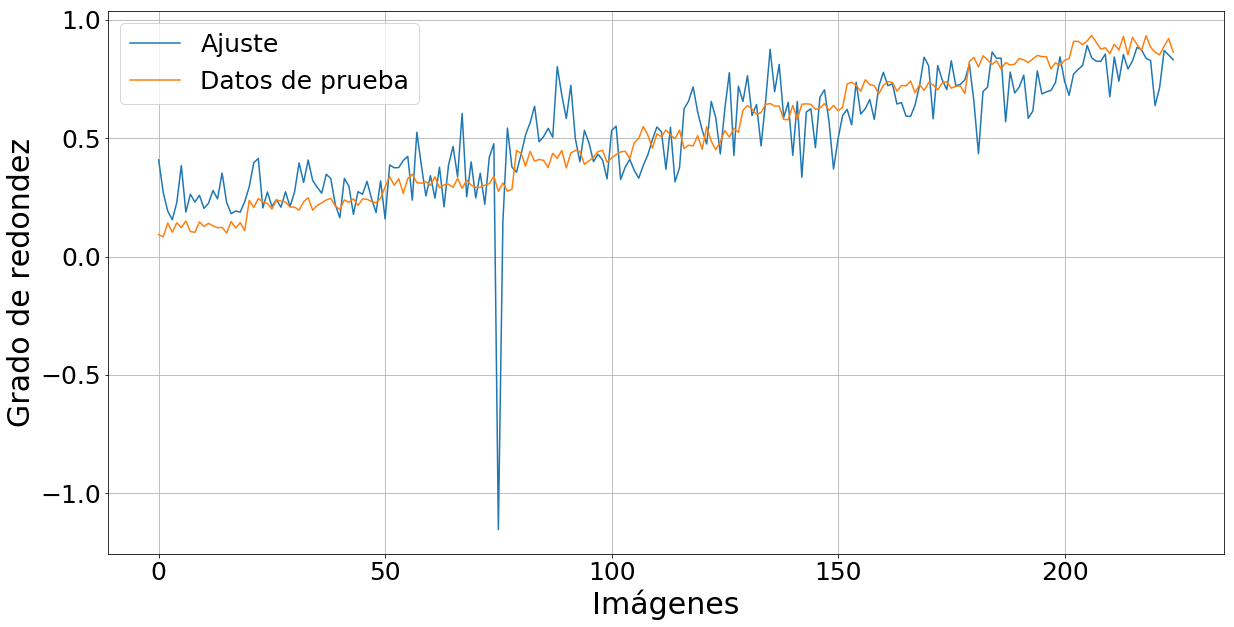

In [426]:
##Test

test_res = test_y
test_res = test_res.reset_index().sort_values('index')
test_x = test_x[test_res.index]
test_res = test_res.reset_index()
ynew = model.predict(test_x)
diff = abs(ynew - test_y)
test_res['predicted'] = ynew
mse = mean_squared_error(test_res['roundness'], test_res['predicted'])
me = statistics.stdev(test_res['predicted'])/math.sqrt(test_res['predicted'].shape[0])
plt.figure(figsize=(20,10))
plt.plot(test_res['predicted'].sort_index(), label="Ajuste")
plt.plot(test_res['roundness'].sort_index(), label="Datos de prueba")
plt.rc('legend', fontsize=25)
plt.ylabel('Grado de redondez', fontsize=30)
plt.xlabel('Imágenes', fontsize=30)
plt.legend(loc="upper left")
#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.grid(True)
plt.show

C:\Users\HeavyRain350\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


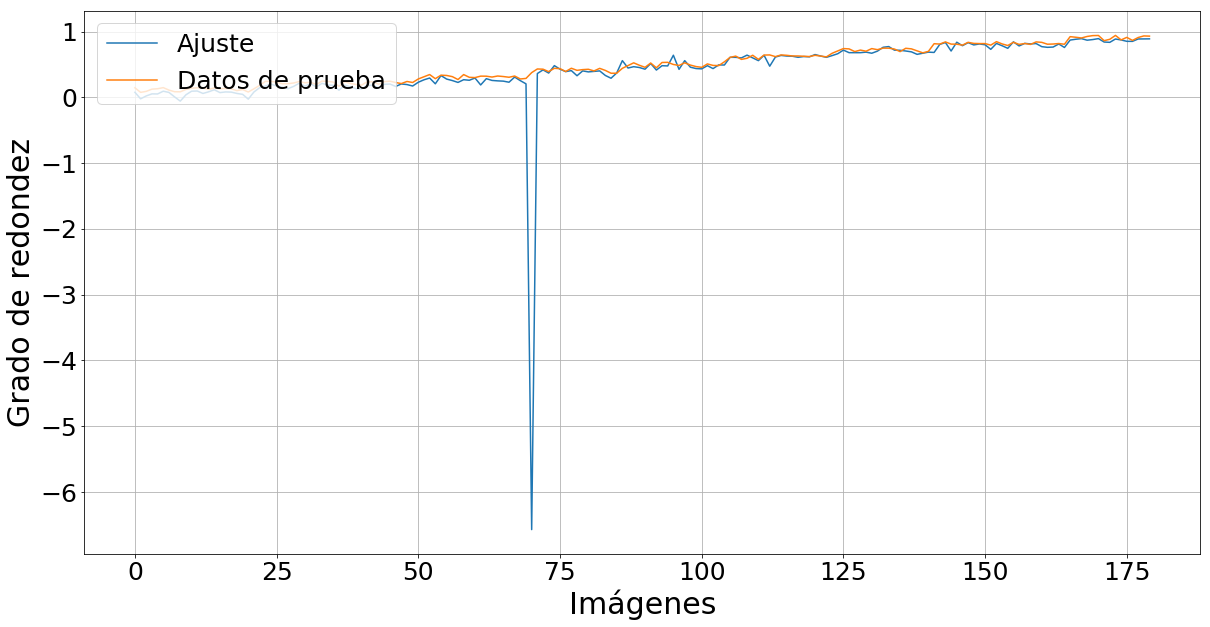

In [464]:
train_x2 = train_x[::5, :]
train_y2 = train_y.iloc[::5,:]
train_y2 = train_y2.reset_index().sort_values('index')
train_x2 = train_x2[train_y2.index]
train_y2 = train_y2.reset_index()
#train_y2 = train_y2.reset_index()
ynew = model.predict(train_x2)
diff = abs(ynew - train_y2)
dummy_y2 = train_y2
dummy_y2['predicted'] = ynew
mse2 = mean_squared_error(dummy_y2['roundness'], dummy_y2['predicted'])
me2 = statistics.stdev(dummy_y2['predicted'])/math.sqrt(dummy_y2['predicted'].shape[0])

figTest=plt.figure(1,figsize=(20,10))
plt.plot(dummy_y2['predicted'].sort_index(), label="Ajuste")
plt.plot(dummy_y2['roundness'].sort_index(), label="Datos de prueba")
plt.rc('legend', fontsize=25)
plt.ylabel('Grado de redondez', fontsize=30)
plt.xlabel('Imágenes', fontsize=30)
plt.legend(loc="upper left")
#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.grid(True)
figTest.show()
figTest.savefig('redondezTesting.png')


In [496]:
train_y2=train_y2.reset_index().sort_values('index')

In [501]:
train_y2

,index,roundness,predicted
71,0,0.147144,0.135400
42,3,0.077683,0.072275
24,13,0.135743,0.141120
15,19,0.143410,0.132731
165,21,0.105966,0.108787
96,28,0.089833,0.077534
120,45,0.140080,0.144986
97,49,0.146276,0.145260
101,62,0.122222,0.117849
81,72,0.135640,0.134468


In [386]:
mse
#Error cuadratico medio

0.029263216089917058

In [387]:
me
#Error promedio o estándar

0.017883638095856524

In [388]:
abEr = abs(dummy_y['roundness']-dummy_y['predicted'])

In [419]:
set1 = abEr[abEr < 0.01]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

42.42761692650334

In [420]:
set1 = abEr[abEr < 0.02]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

67.48329621380846

In [421]:
set1 = abEr[abEr < 0.05]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

91.0913140311804

In [423]:
set1 = abEr[abEr < 0.08]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

96.88195991091314

In [424]:
set1 = abEr[abEr < 0.09]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

97.55011135857461

In [422]:
set1 = abEr[abEr < 0.1]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

98.21826280623608

In [452]:
dummy_y


,roundness,predicted
210,0.211329,0.219201
704,0.620382,0.609260
705,0.590895,0.572035
877,0.830665,0.805237
663,0.578033,0.659726
462,0.448553,0.400879
718,0.643433,0.638363
1095,0.903000,0.860226
234,0.218078,0.207795
1065,0.851000,0.807937


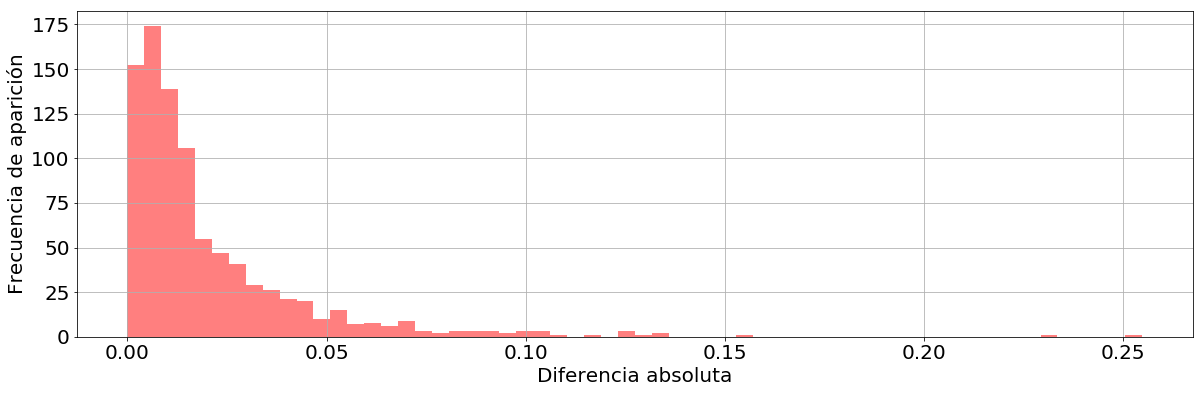

In [506]:
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(abEr, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Diferencia absoluta', fontsize=20)
plt.ylabel('Frecuencia de aparición', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaError.png')

In [504]:
#Error cuadratico medio
mse2

0.0011868462656432707

In [505]:
#Error estandar o promedio
me2

0.01929572372362336

In [16]:
sess = tf.compat.v1.Session()
print(sess)

In [ ]:
###COnfiguracion para 5 clases

train_x = data.iloc[np.r_[0:124,250:374,500:625,750:875,1000:1123],1:242]

train_y = data.iloc[np.r_[0:124,250:374,500:625,750:875,1000:1123],0:1]
#np.r_[661:848,0:98]
#train_x = train_df.iloc[:,lim_inf:lim_sup]

#train_y = train_df.iloc[:,0:1]
#np.r_[214:275,0:27]
#test_x = test_df.iloc[:,lim_inf:lim_sup]

#test_y = test_df.iloc[:,0:1]

#Para cuando se usa PCA
#train_x, test_x, train_y, test_y = train_test_split(matrix[:,np.r_[9:50,69:100,109:150]], train_y, test_size=0.2)
#Cuando se usa los datos directo 5:50,65:110,125:170,185:230
train_x, test_x, train_y, test_y = train_test_split(train_x.iloc[:,np.r_[5:50,65:110,125:170,185:230]], train_y, test_size=0.1)

sc = StandardScaler() 
train_x = sc.fit_transform(train_x) 
test_x = sc.transform(test_x)

n_cols = train_x.shape[1] 
model = Sequential() 
model.add(Dense(500, activation="relu", input_shape=(n_cols,))) 
model.add(Dense(150,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(150,activation="relu")) 
model.add(Dense(400,activation="relu")) 
model.add(Dense(75,activation="relu"))
model.add(Dense(75,activation="relu"))
model.add(Dense(75,activation="relu"))
model.add(Dense(5,activation="relu")) 
model.add(Dense(1,activation="linear")) 
opt = keras.optimizers.Adadelta( learning_rate=0.005, rho=0.5, epsilon=3.5e-04)
#learning_rate=0.0068, rho=0.5,momentum=0.1

#my_lr_scheduler = keras.callbacks.LearningRateScheduler(adapt_learning_rate) 
model.compile(optimizer=opt, loss='mse',metrics=['mae','mse','mape','cosine'])

#set early stopping monitor so the model stops training when it won't improve anymore 
early_stopping_monitor = EarlyStopping(patience=10,monitor='loss')

#train model #,callbacks=[early_stopping_monitor]
model.fit(train_x,train_y,validation_data = (test_x,test_y),callbacks=[early_stopping_monitor], epochs=600,verbose=0)